In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv('dataset/dataset.csv')

Declare a function to show a plot about a regression

In [ ]:
def create_plot(x, y, locations, x_label, y_label, title, coeff, intercept, show_names, generate_pdf):    
    plt.figure(figsize=(16, 8))
    plt.title(title)
    plt.scatter(x, y)

    plt.plot(x, coeff * x + intercept, color='red')

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    if show_names:
        for i, txt in enumerate(locations):
            plt.annotate(txt[0], (x[i], y[i]), xytext=(x[i], y[i]))

    if generate_pdf:
        plt.savefig('pdfs/{}.pdf'.format(title))

    plt.show()

def contains_nan(array):
    for i in array:
        if np.isnan(i):
            return True
    return False

# Simple regressions on custom performance index

We filter for wave 1
We define as **Performance Index** the following variable:

Setting indipendent variables

Performing multiple regression using **performance index** as the dependent variable

In [ ]:
show_names_in_plots = True
save_pdf = False

for wave in set(dataset['wave']):
    dataset_wave = dataset[dataset['wave'] == wave]

    new_cases_pc = (dataset_wave['new_cases'].values) / (dataset_wave['population'].values)
    new_deaths_pc = (dataset_wave['new_deaths'].values) / (dataset_wave['population'].values)
    new_tests_pc = (dataset_wave['new_tests'].values) / (dataset_wave['population'].values)
    new_vaccinations_pc = (dataset_wave['new_vaccinations'].values) / (dataset_wave['population'].values)
    icu_patients_pc = (dataset_wave['icu_patients'].values) / (dataset_wave['population'].values)

    dataset_wave['performance_index'] = (1 * new_tests_pc) + (4 * new_vaccinations_pc) - (2 * icu_patients_pc) - (1 * new_cases_pc) - (3 * new_deaths_pc)

    X = []
    X_names = []

    if not contains_nan(dataset_wave['corruption_control'].values):
        X.append(dataset_wave['corruption_control'].values)
        X_names.append('Corruption Control')

    if not contains_nan(dataset_wave['cpi'].values):
        X.append(dataset_wave['cpi'].values)
        X_names.append('CPI')

    if not contains_nan(dataset_wave['governament_effectiveness'].values):
        X.append(dataset_wave['governament_effectiveness'].values)
        X_names.append('Governament Effectiveness')

    if not contains_nan(dataset_wave['healthcare_expenditure'].values):
        X.append(dataset_wave['healthcare_expenditure'].values)
        X_names.append('Healthcare Expenditure')

    if not contains_nan(dataset_wave['political_regime'].values):
        X.append(dataset_wave['political_regime'].values)
        X_names.append('Political Regime')

    if not contains_nan(dataset_wave['trust_in_governance'].values):
        X.append(dataset_wave['trust_in_governance'].values)
        X_names.append('Trust in Governance')

    if not contains_nan(dataset_wave['government_type'].values):
        X.append(dataset_wave['government_type'].values)
        X_names.append('Government Type')

    X = np.array(X).T

    locations = np.array([
        dataset_wave['location'].values
    ]).T

    Y = dataset_wave['performance_index'].values

    model = LinearRegression().fit(X, Y)

    coeff = model.coef_
    intercept = model.intercept_
    
    X2 = sm.add_constant(X)

    est = sm.OLS(Y, X2)
    est2 = est.fit()

    print(est2.summary(
        xname=['Const'] + X_names,
        yname='Performance index for wave ' + str(wave)
    ))

    i = 0
    for x_variable in X.T:
        create_plot(x_variable, Y, locations, X_names[i], 'Performance Index', 'Performance Index vs {} for wave {}'.format(X_names[i], wave), coeff[i], intercept, show_names_in_plots, save_pdf)
        i += 1

    print('//////////////////////////////////////////////////////////////////////////////////////////////')


# Simple regressions on each public health variable

                             OLS Regression Results                             
Dep. Variable:     new_cases for wave 4   R-squared:                       0.106
Model:                              OLS   Adj. R-squared:                 -0.043
Method:                   Least Squares   F-statistic:                    0.7130
Date:                  Tue, 01 Feb 2022   Prob (F-statistic):              0.641
Time:                          18:52:11   Log-Likelihood:                 99.175
No. Observations:                    43   AIC:                            -184.3
Df Residuals:                        36   BIC:                            -172.0
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Co

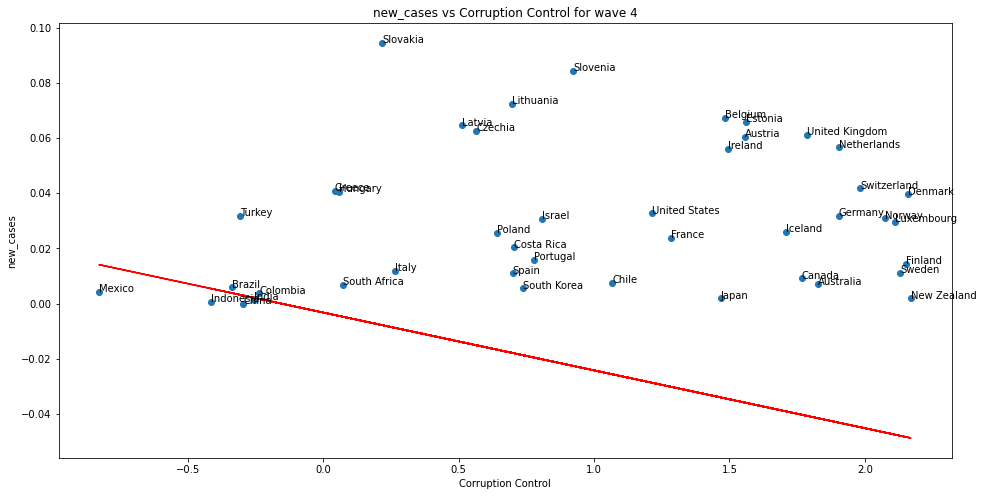

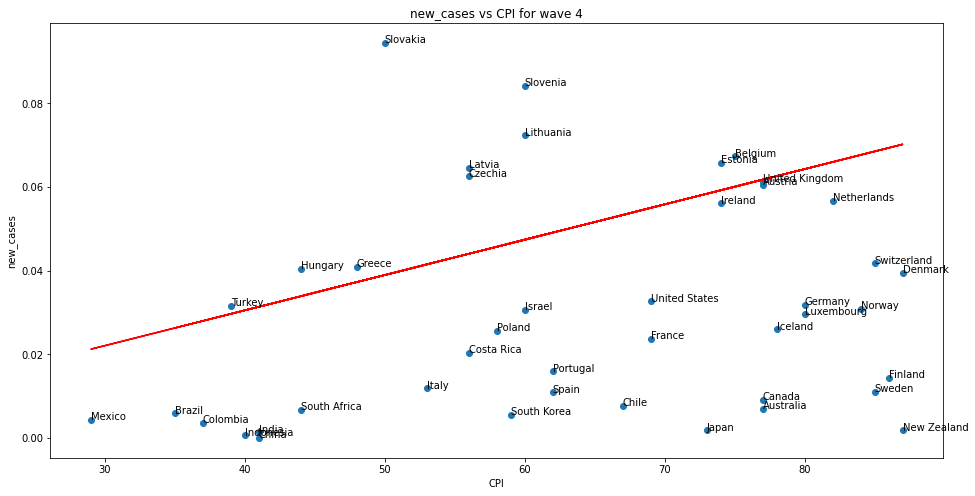

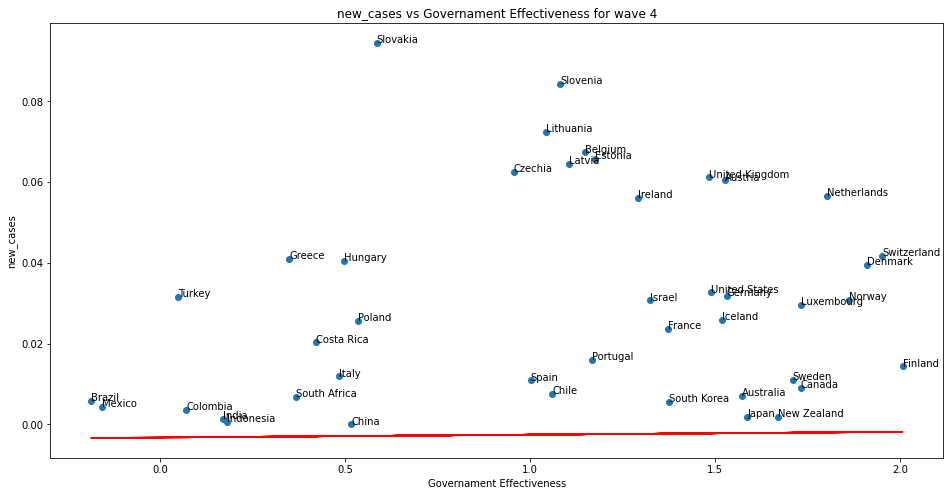

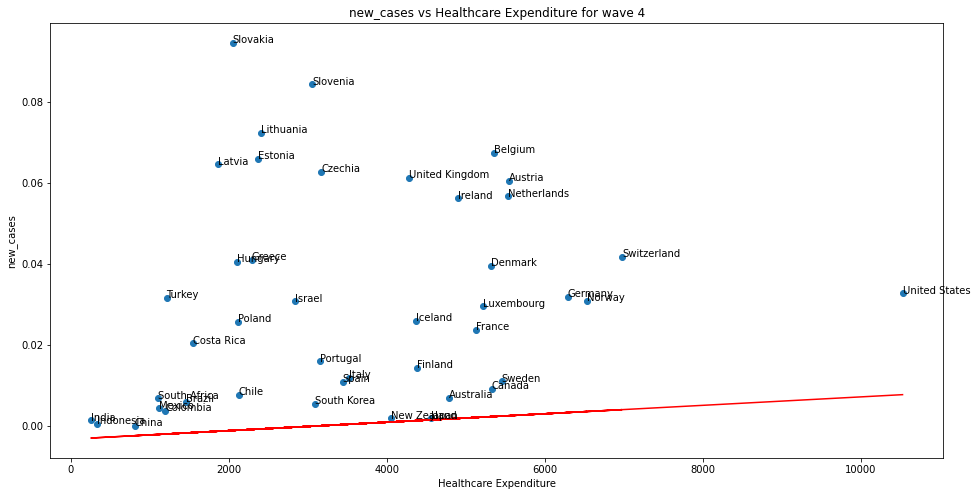

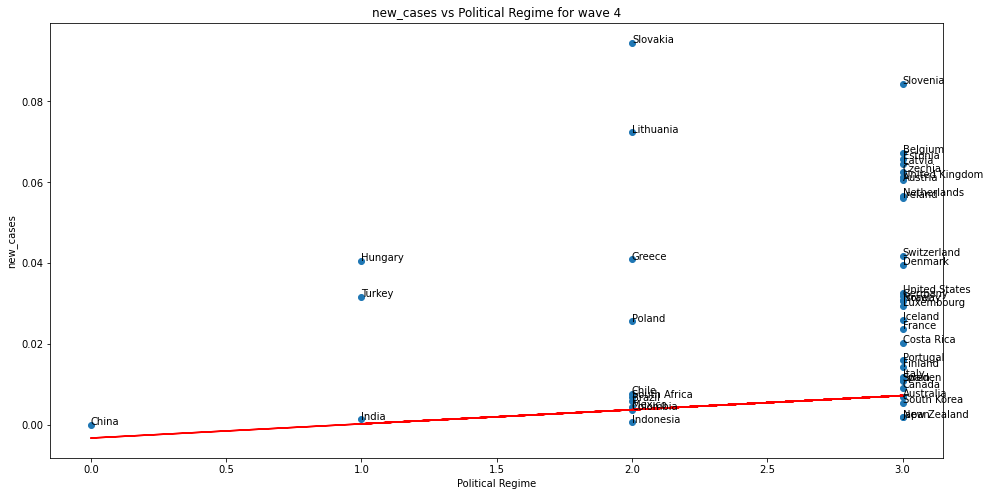

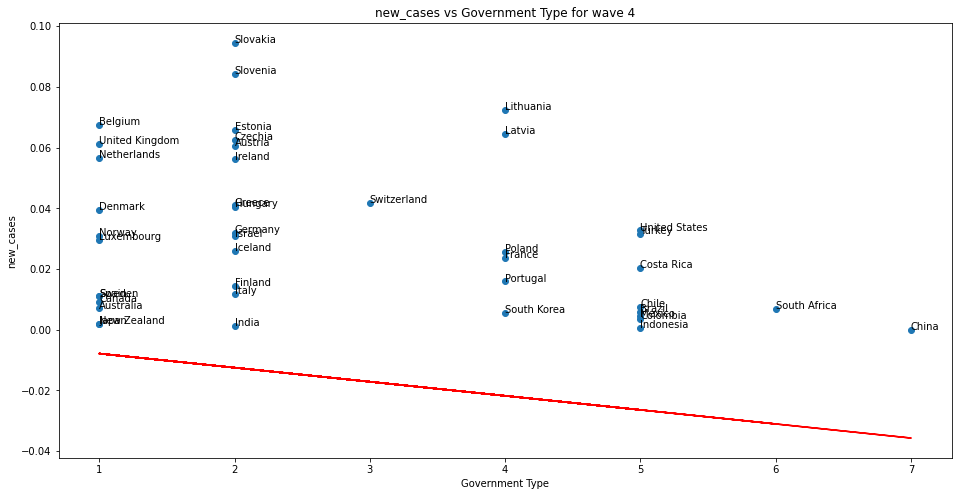

//////////////////////////////////////////////////////////////////////////////////////////////
                              OLS Regression Results                             
Dep. Variable:     new_deaths for wave 4   R-squared:                       0.092
Model:                               OLS   Adj. R-squared:                 -0.060
Method:                    Least Squares   F-statistic:                    0.6066
Date:                   Tue, 01 Feb 2022   Prob (F-statistic):              0.723
Time:                           18:52:11   Log-Likelihood:                 300.41
No. Observations:                     43   AIC:                            -586.8
Df Residuals:                         36   BIC:                            -574.5
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025    

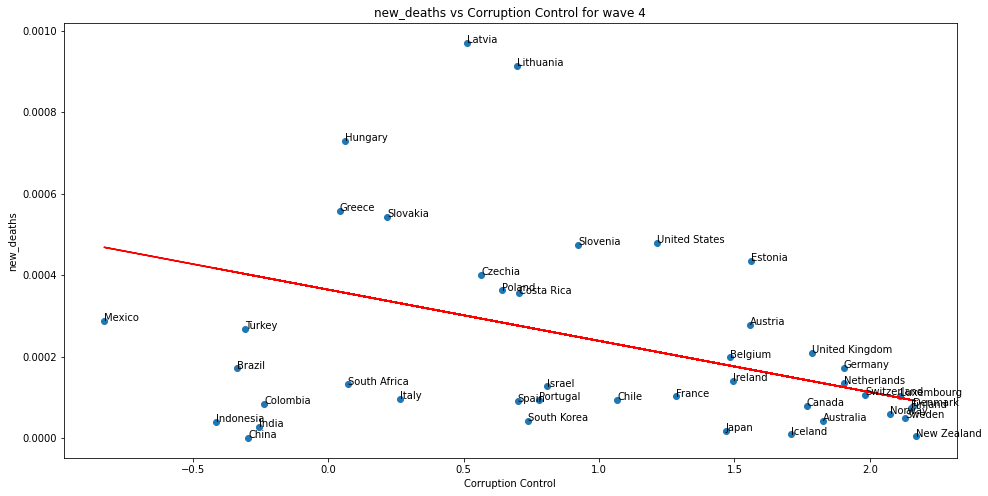

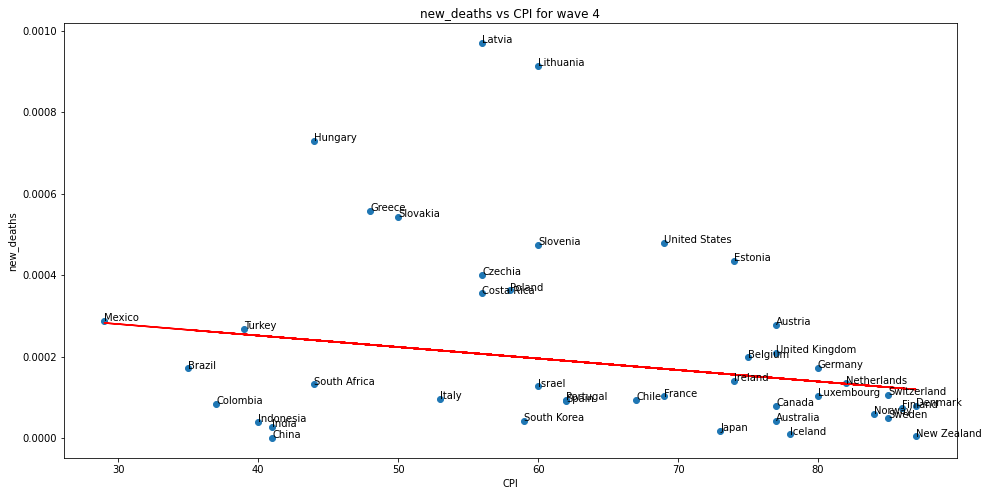

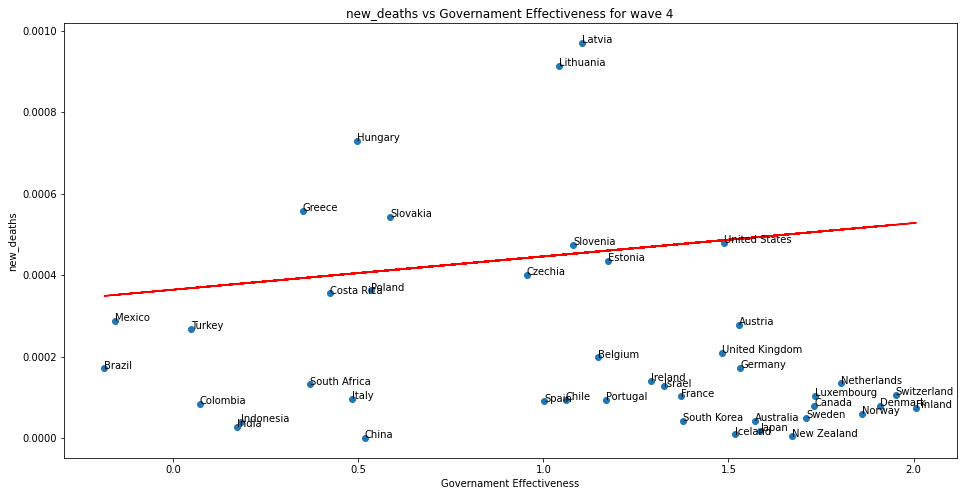

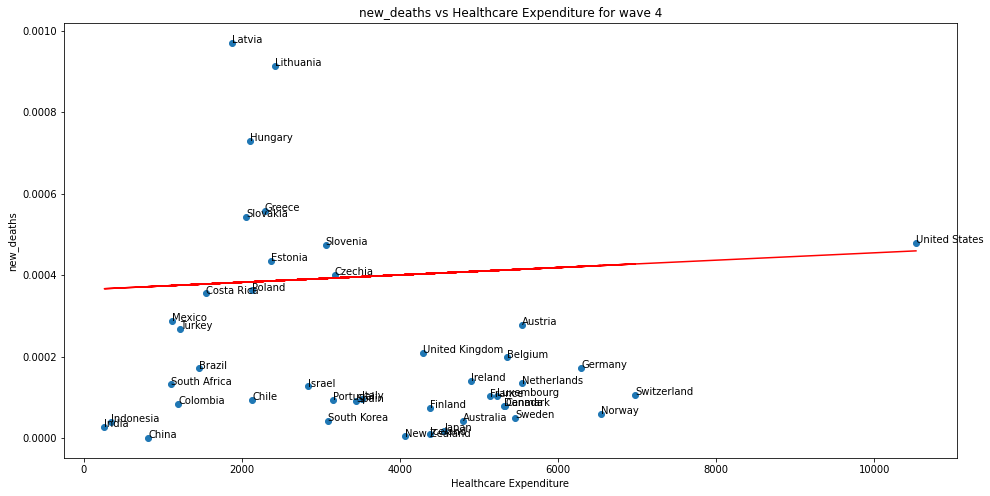

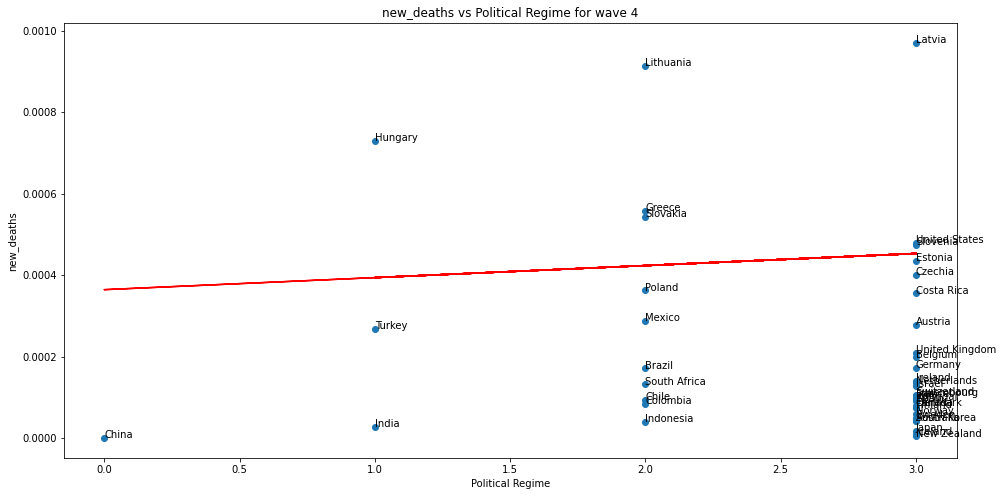

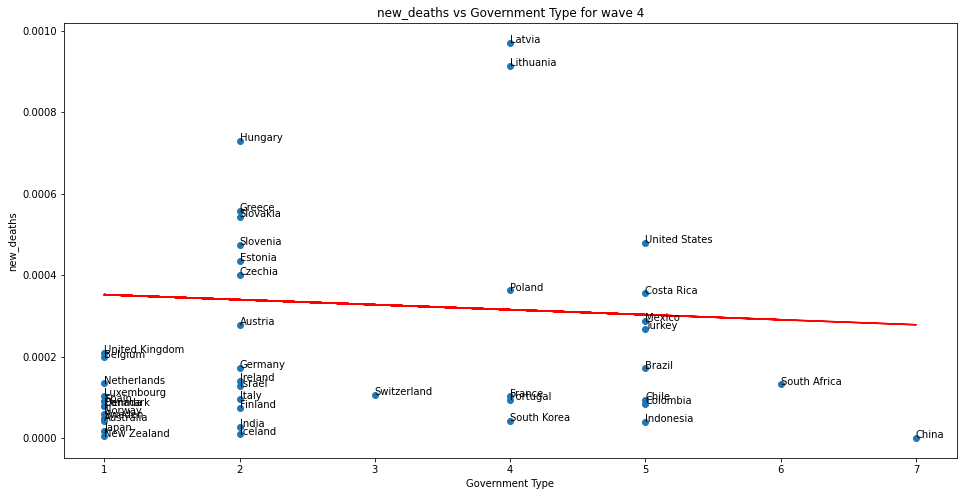

//////////////////////////////////////////////////////////////////////////////////////////////
                             OLS Regression Results                             
Dep. Variable:     new_tests for wave 4   R-squared:                       0.141
Model:                              OLS   Adj. R-squared:                 -0.002
Method:                   Least Squares   F-statistic:                    0.9860
Date:                  Tue, 01 Feb 2022   Prob (F-statistic):              0.449
Time:                          18:52:12   Log-Likelihood:                -43.330
No. Observations:                    43   AIC:                             100.7
Df Residuals:                        36   BIC:                             113.0
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-

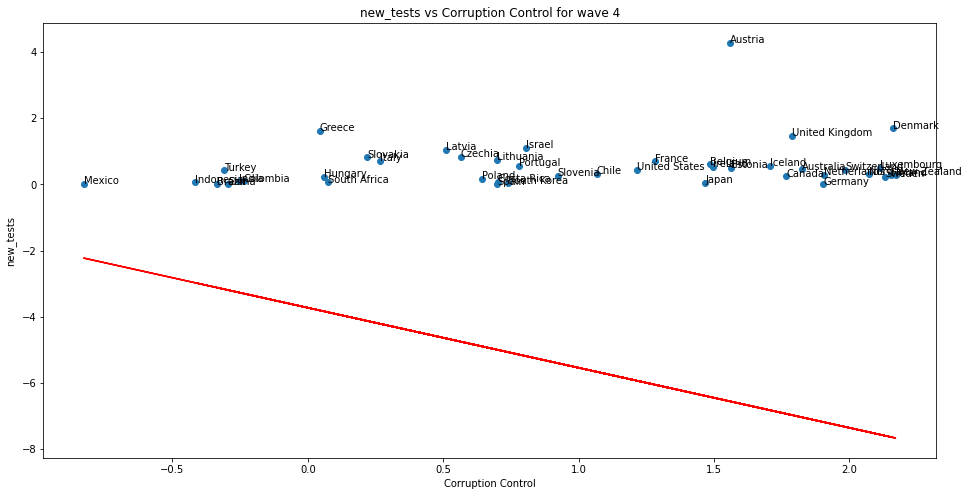

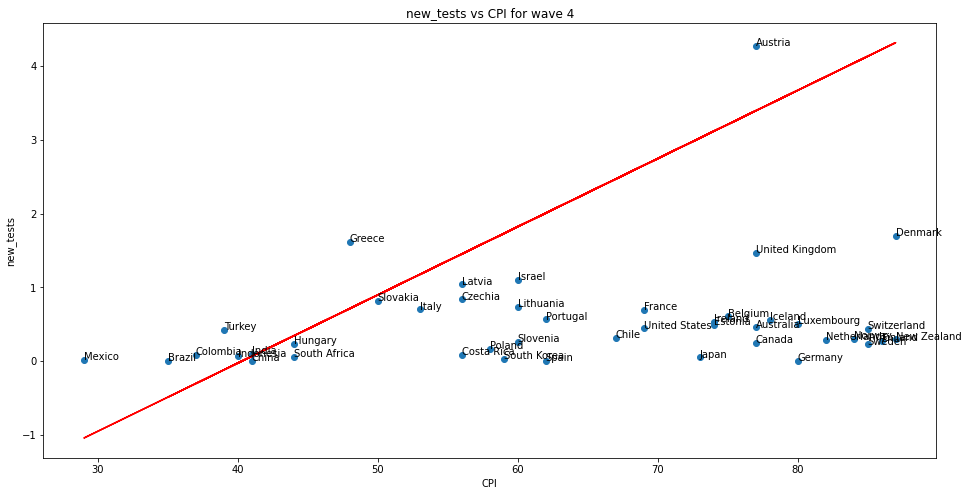

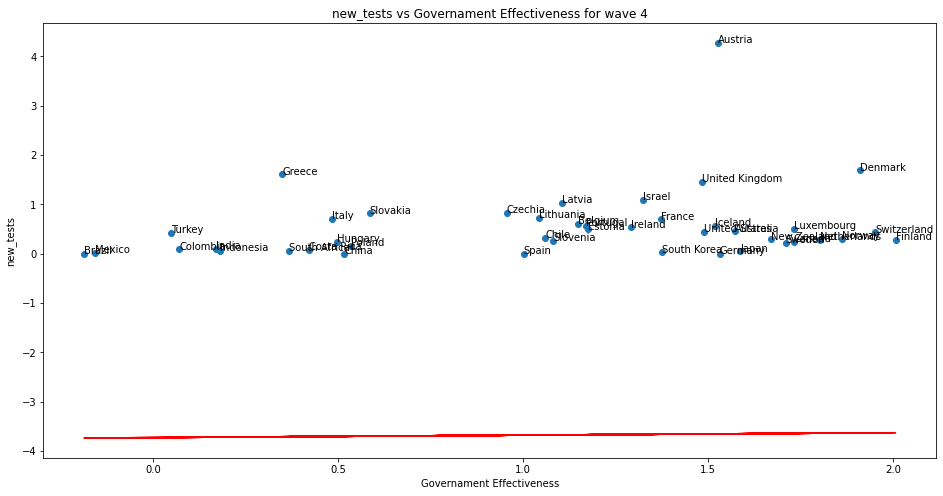

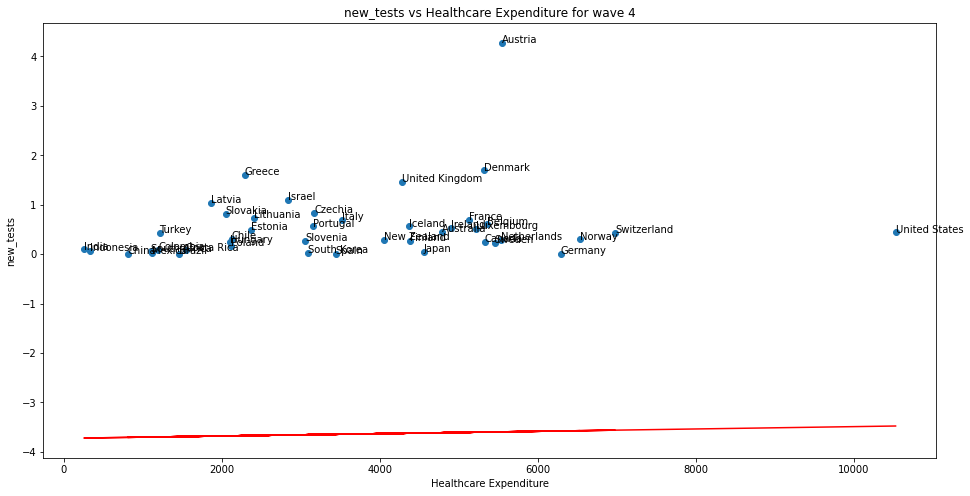

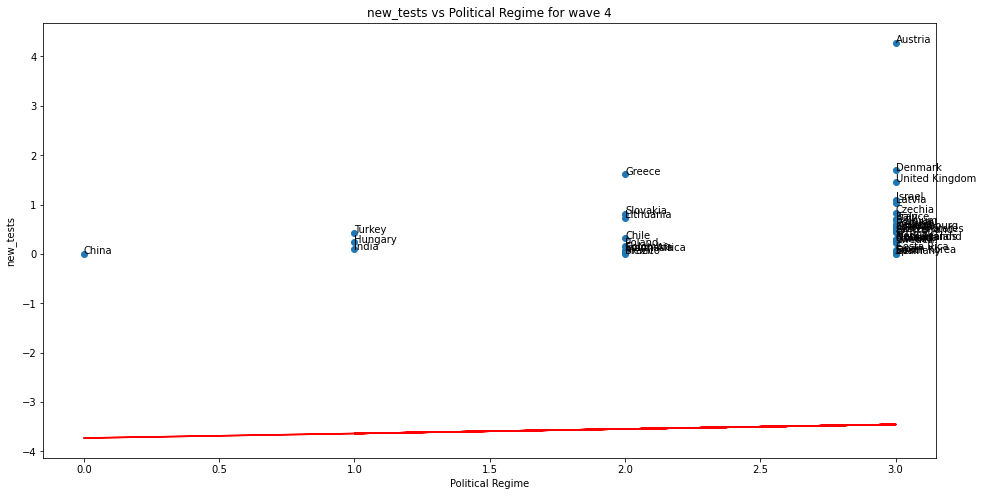

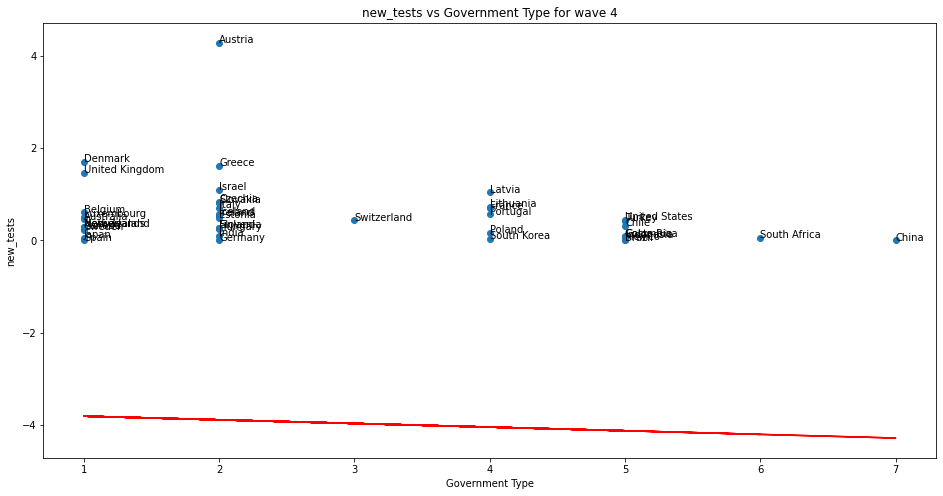

//////////////////////////////////////////////////////////////////////////////////////////////
                               OLS Regression Results                              
Dep. Variable:     icu_patients for wave 4   R-squared:                       0.343
Model:                                 OLS   Adj. R-squared:                  0.234
Method:                      Least Squares   F-statistic:                     3.134
Date:                     Tue, 01 Feb 2022   Prob (F-statistic):             0.0142
Time:                             18:52:13   Log-Likelihood:                 226.64
No. Observations:                       43   AIC:                            -439.3
Df Residuals:                           36   BIC:                            -427.0
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                                coef    std err          t      P

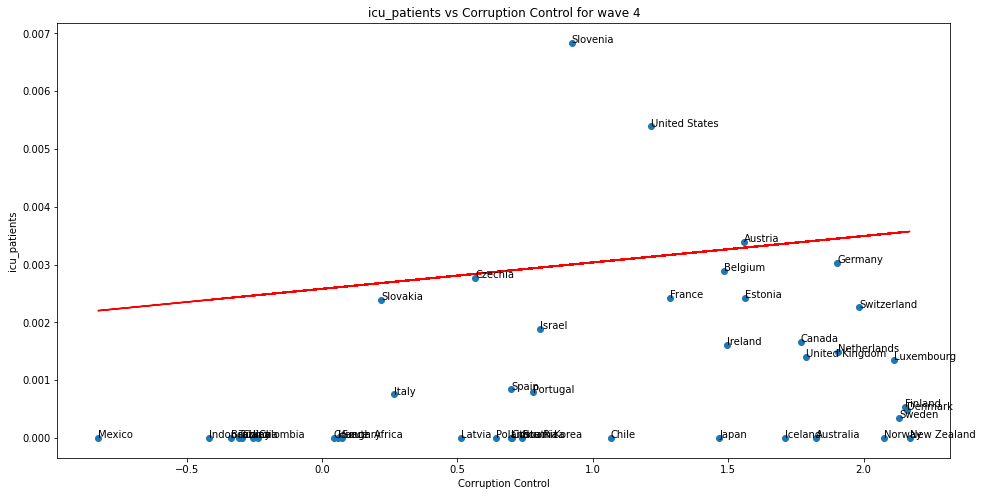

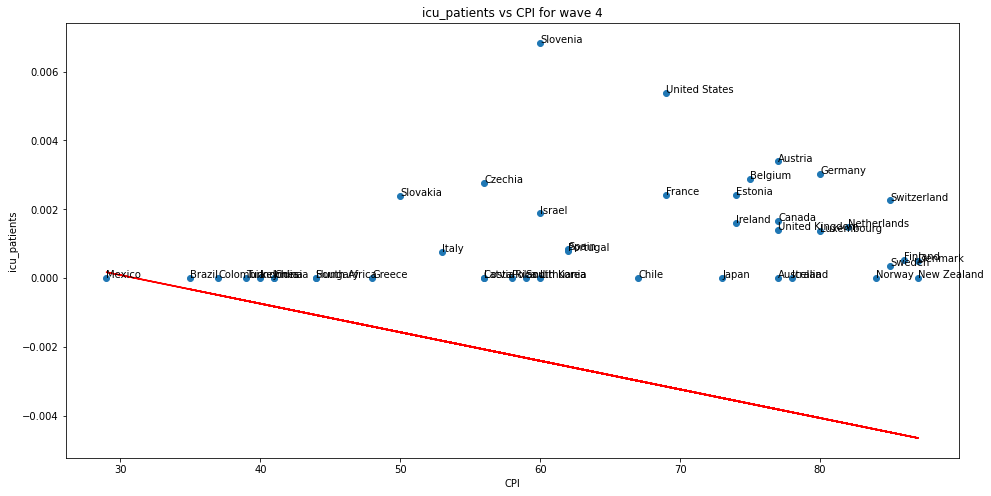

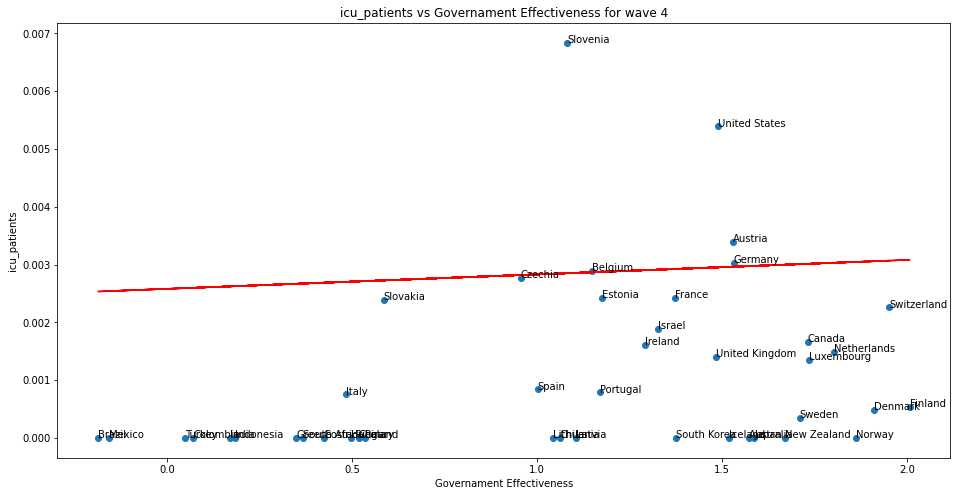

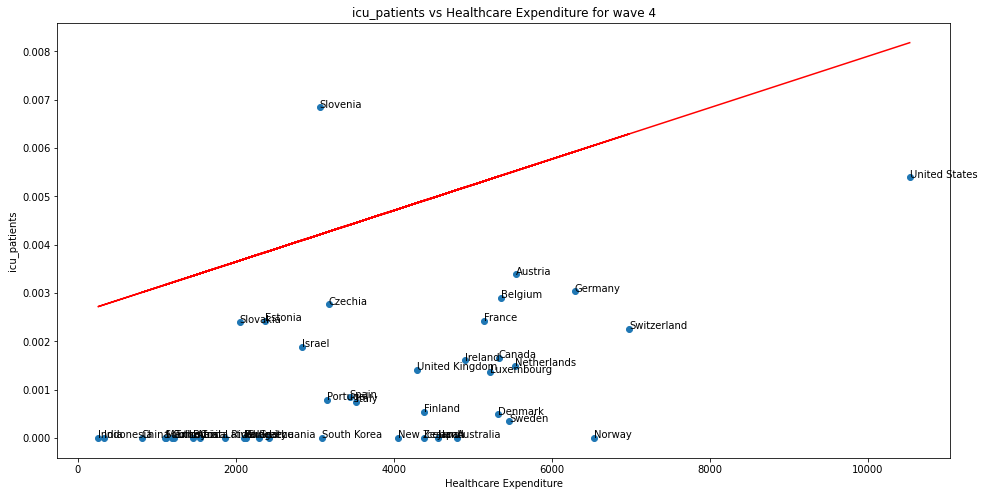

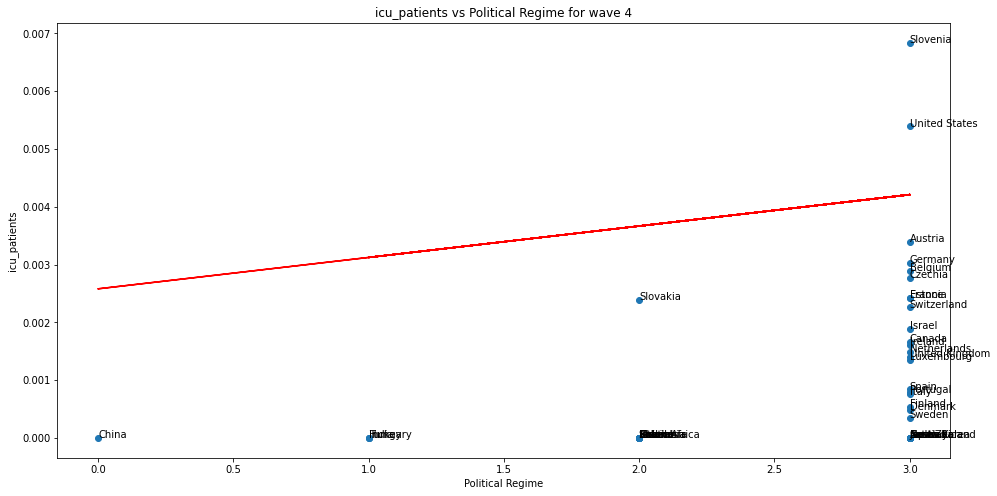

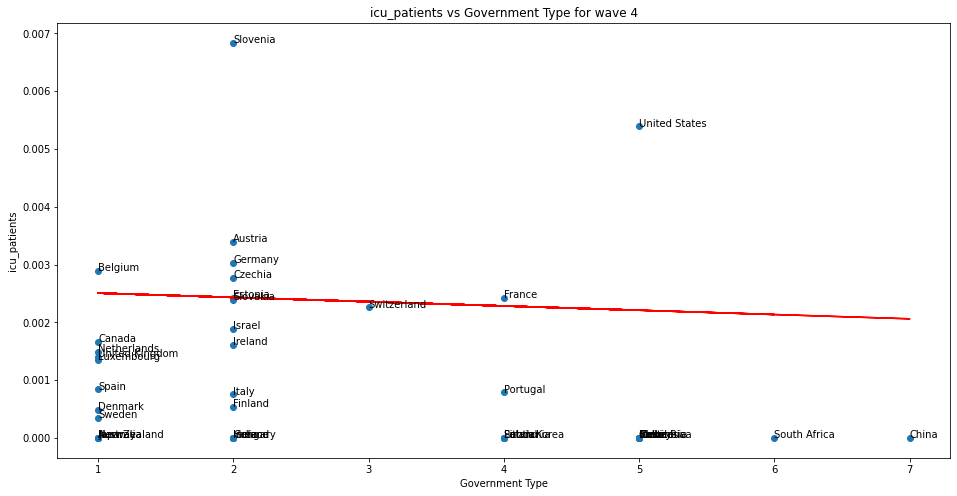

//////////////////////////////////////////////////////////////////////////////////////////////
                                 OLS Regression Results                                
Dep. Variable:     new_vaccinations for wave 4   R-squared:                       0.017
Model:                                     OLS   Adj. R-squared:                 -0.147
Method:                          Least Squares   F-statistic:                    0.1043
Date:                         Tue, 01 Feb 2022   Prob (F-statistic):              0.995
Time:                                 18:52:14   Log-Likelihood:                 4.4982
No. Observations:                           43   AIC:                             5.004
Df Residuals:                               36   BIC:                             17.33
Df Model:                                    6                                         
Covariance Type:                     nonrobust                                         
                         

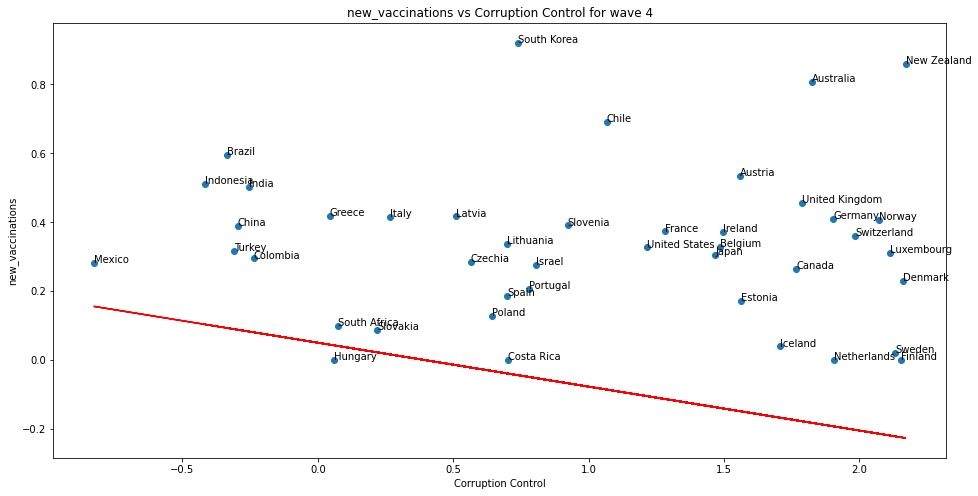

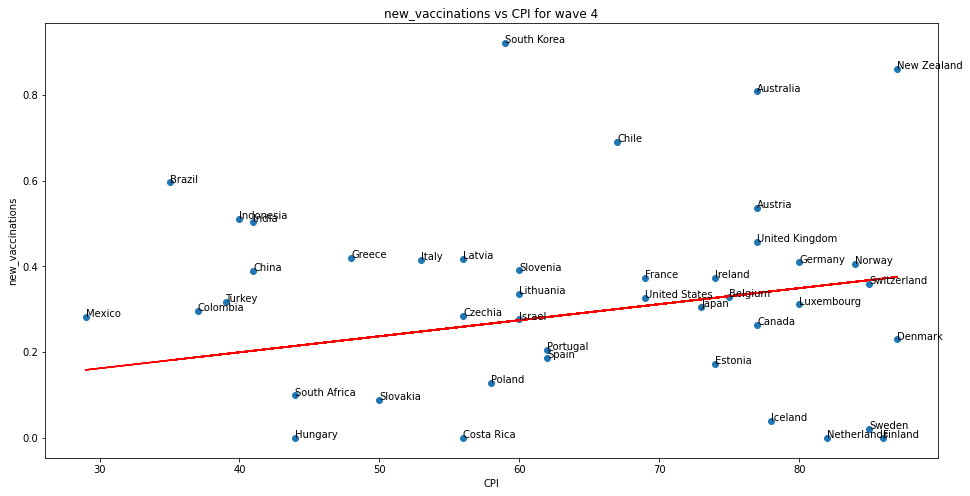

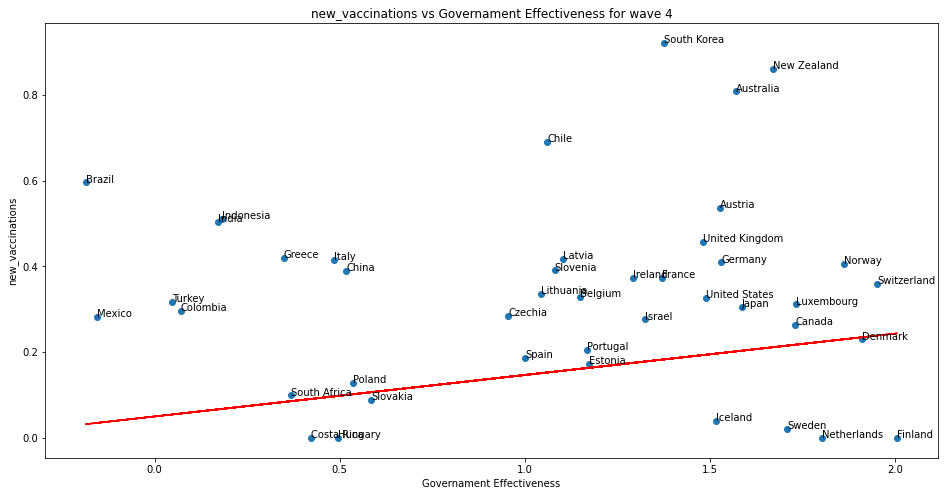

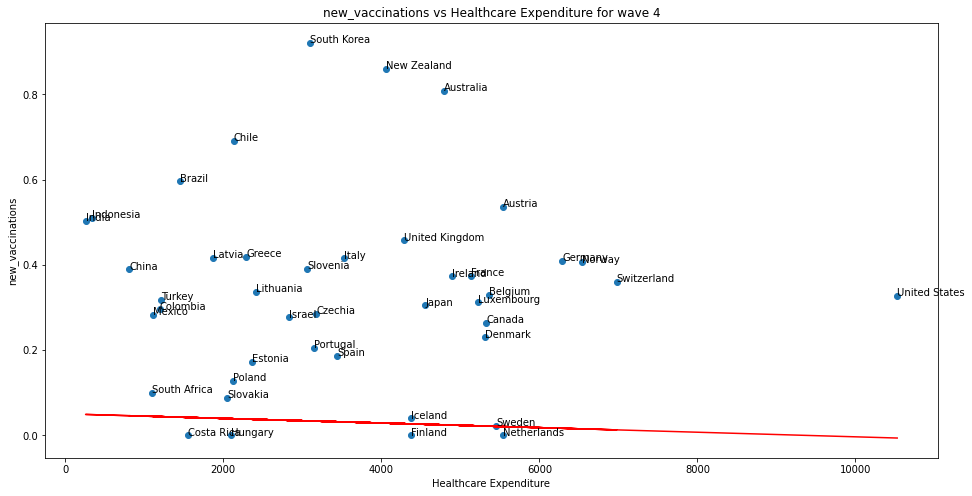

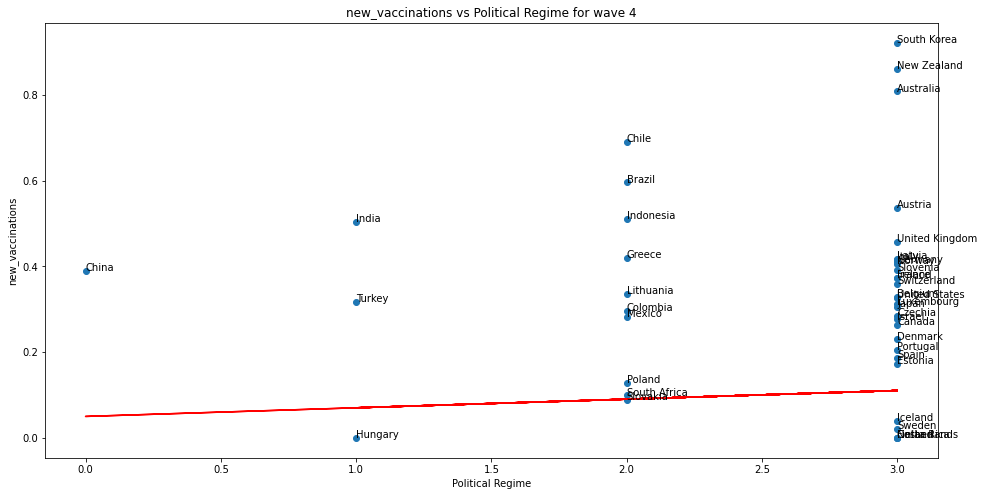

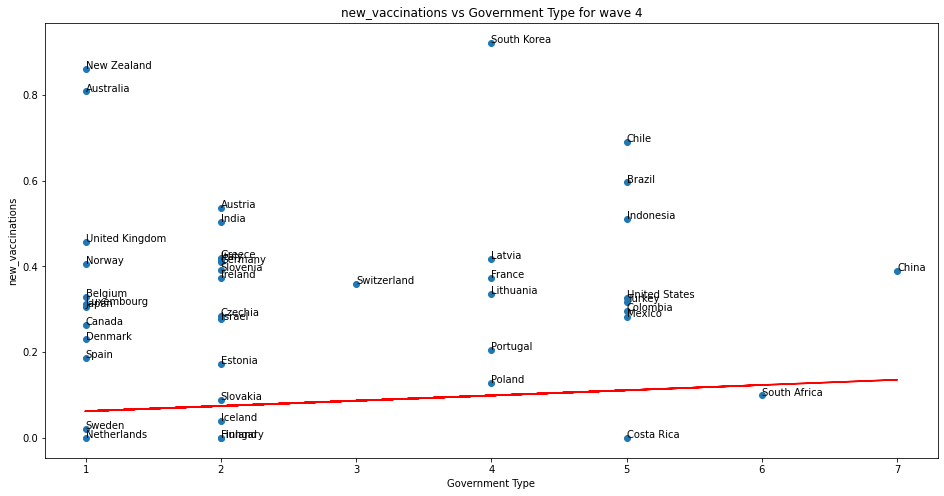

//////////////////////////////////////////////////////////////////////////////////////////////


In [39]:
show_names_in_plots = True
generate_pdf = False

variables_to_analyze = [
    'new_cases',
    'new_deaths',
    'new_tests',
    'icu_patients',
    'new_vaccinations'
]

for variable in variables_to_analyze:
    for wave in set(dataset['wave']):
        dataset_wave = dataset[dataset['wave'] == wave]

        X = []
        X_names = []

        if not contains_nan(dataset_wave['corruption_control'].values):
            X.append(dataset_wave['corruption_control'].values)
            X_names.append('Corruption Control')

        if not contains_nan(dataset_wave['cpi'].values):
            X.append(dataset_wave['cpi'].values)
            X_names.append('CPI')

        if not contains_nan(dataset_wave['governament_effectiveness'].values):
            X.append(dataset_wave['governament_effectiveness'].values)
            X_names.append('Governament Effectiveness')

        if not contains_nan(dataset_wave['healthcare_expenditure'].values):
            X.append(dataset_wave['healthcare_expenditure'].values)
            X_names.append('Healthcare Expenditure')

        if not contains_nan(dataset_wave['political_regime'].values):
            X.append(dataset_wave['political_regime'].values)
            X_names.append('Political Regime')

        if not contains_nan(dataset_wave['trust_in_governance'].values):
            X.append(dataset_wave['trust_in_governance'].values)
            X_names.append('Trust in Governance')

        if not contains_nan(dataset_wave['government_type'].values):
            X.append(dataset_wave['government_type'].values)
            X_names.append('Government Type')

        X = np.array(X).T

    locations = np.array([
        dataset_wave['location'].values
    ]).T

    Y = (dataset_wave[variable].values / dataset_wave['population'].values)

    model = LinearRegression().fit(X, Y)

    coeff = model.coef_
    intercept = model.intercept_
    X2 = sm.add_constant(X)

    est = sm.OLS(Y, X2)
    est2 = est.fit()

    print(est2.summary(
        xname=['Const'] + X_names,
        yname='{} for wave {}'.format(variable, wave)
    ))

    i = 0
    for x_variable in X.T:
        create_plot(x_variable, Y, locations, X_names[i], variable, '{} vs {} for wave {}'.format(variable, X_names[i], wave), coeff[i], intercept, show_names_in_plots, generate_pdf)
        i += 1

    print('//////////////////////////////////////////////////////////////////////////////////////////////')